# Data Mining for Business Analytics

## Model evaluation and Overfitting

Spring 2019 - Prof. George Valkanas

Material based on content courtesy of Prof. Foster Provost

***

In [2]:
# Import the libraries we will be using

import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import datasets

from dstools import data_tools


# for plotting
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import graphviz
import pydotplus

import matplotlib.pylab as plt
%matplotlib inline

# plt.rcParams['figure.figsize'] = 14, 10

## Model Evaluation

Well, we've already seen 3 classification techniques so far. Which is the best one?


Well, we need a way to evaluate it and measure its performance. How do we do that?

Let's say that we run our classification model on our small dataset and we get the following information:

<table>
    <tr style="font-size: large; font-weight: bold; background-color: light-gray">
        <td style="border: 2px solid black"> ID </td> 
        <td style="border: 2px solid black"> True Label </td> 
        <td style="border: 2px solid black"> Predicted Label </td>
    </tr>
    <tr style="background-color: lightgreen">
        <td style="border: 2px solid black"> 1 </td> <td> 1 </td> <td style="border: 2px solid black"> 1 </td>
    </tr>
    <tr style="background-color: lightgreen; border: 2px solid black">
        <td style="border: 2px solid black"> 2 </td> <td> 1 </td> <td style="border: 2px solid black"> 1 </td>
    </tr>
    <tr style="background-color: lightgreen; border: 2px solid black">
        <td style="border: 2px solid black"> 3 </td> <td> 0 </td> <td style="border: 2px solid black"> 0 </td>
    </tr>
    <tr style="background-color: tomato; border: 2px solid black">
        <td style="border: 2px solid black"> 4 </td> <td> 0 </td> <td style="border: 2px solid black"> 1 </td>
    </tr>
    <tr style="background-color: lightgreen; border: 2px solid black">
        <td style="border: 2px solid black"> 5 </td> <td> 0 </td> <td style="border: 2px solid black"> 0 </td>
    </tr>
    <tr style="background-color: lightgreen; border: 2px solid black">
        <td style="border: 2px solid black"> 6 </td> <td> 1 </td> <td style="border: 2px solid black"> 1 </td>
    </tr>
    <tr style="background-color: tomato; border: 2px solid black">
        <td style="border: 2px solid black"> 7 </td> <td> 1 </td> <td style="border: 2px solid black"> 0 </td>
    </tr>
    <tr style="background-color: tomato; border: 2px solid black">
        <td style="border: 2px solid black"> 8 </td> <td> 1 </td> <td style="border: 2px solid black"> 0 </td>
    </tr>
    <tr style="background-color: lightgreen; border: 2px solid black">
        <td style="border: 2px solid black"> 9 </td> <td> 0 </td> <td style="border: 2px solid black"> 0 </td>
    </tr>
    <tr style="background-color: tomato; border: 2px solid black">
        <td style="border: 2px solid black"> 10 </td> <td> 0 </td> <td style="border: 2px solid black"> 1 </td>
    </tr>
</table>
<br/>


**Question:** How good would you say that the model is? Can you come up with a measure to evaluate it?



### Model Accuracy


OK, so we've established a (simple) measure to evaluate our model. We can use that to compare different data mining techniques / models.

Let's go back to our example, that we've all come to love. :-)  We'll learn our classifiers and then apply them to measure their accuracy.

We'll save ourselves some time and rely on code that we've written in the past.

But is that enough?  Let's discuss this with a simple example.


In [3]:
# Set the randomness
np.random.seed(36)

# Number of users, i.e. number of instances in our dataset
n_users = 500

# Features that we know about each user. The attributes below are for illustration purposes only!
variable_names = ["name", "age", "years_customer"]
variables_keep = ["years_customer", "age"]
target_name = "response"

# Generate data with the "datasets" function from SKLEARN (package)
# This function returns two variables: predictors and target
predictors, target = datasets.make_classification(n_features=3, n_redundant=0, 
                                                  n_informative=2, n_clusters_per_class=2,
                                                  n_samples=n_users)

# We will write this data in a dataframe (pandas package)
data = pd.DataFrame(predictors, columns=variable_names)

# We want to take each column of the dataframe to change the values 
data['age'] = data['age'] * 10 + 50
data['years_customer'] = (data['years_customer'] + 6)/2
data[target_name] = target

# Our variables (features) will be stored in one variable called X
X = data[variables_keep]

# Our target will be stored in one variable called Y
Y = data[target_name]


In [4]:

def print_model_accuracy( model_name, model, data_feats, true_values ):
    model_acc = metrics.accuracy_score(model.predict(data_feats), true_values)
    print ( "[%s] Accuracy = %.3f" % (model_name, model_acc) )
    return


In [5]:

# Learn a decision tree, just like the one we've learned in our previous lecture
tree_clf = DecisionTreeClassifier(max_depth=10,criterion="entropy")
tree_clf.fit(X, Y)
print_model_accuracy( "Decision Tree", tree_clf, X, Y )

# Learn a Logistic Regression model
log_reg = LogisticRegression(solver='lbfgs')
log_reg.fit(X, Y)
print_model_accuracy( "Logistic Regression", log_reg, X, Y )

[Decision Tree] Accuracy = 0.988
[Logistic Regression] Accuracy = 0.928


### What about a Decision Trees that aren't that deep ?

In [ ]:
# Learn a decision tree, just like the one we've learned in our previous lecture
tree_clf = DecisionTreeClassifier(max_depth=7,criterion="entropy")
tree_clf.fit(X, Y)
print_model_accuracy( "Decision Tree", tree_clf, X, Y )


#And a shorter one?
tree_clf = DecisionTreeClassifier(max_depth=5,criterion="entropy")
tree_clf.fit(X, Y)
print_model_accuracy( "Decision Tree", tree_clf, X, Y )


## Overfitting your data


OK. We are onto something here, it seems. The shorter the tree, the worse accuracy that we learn. Why is that though?

[Note]: It's a good idea to try and generate the decision surfaces of the above trees (on your own). This will give you a better - more visual - understanding of what is happening.


### What is happening is called `Overfitting`

Here's a <a href="https://twitter.com/plinz/status/674683831048384514"> cute explanation</a> of the problem.
<br/>


**[Refresher on terminology]** Classification VS Regression
<br/>

Let's better understand what is happening through an example. Instead of a classification problem, let's work a simple numerical dataset where we want to do regression.

In [ ]:
num_samples = 50

# Set randomness so that we all get the same answer
np.random.seed(42)


# This is what the true function is
def true_function(X):
    return np.sin(1.5 * np.pi * X)


def plot_example(X, Y, functions):
    # Get some X's to plot the functions
    X_test = pd.DataFrame(np.linspace(0, 1, 100), columns=['X'])

    # Plot the different functions, using the provided information
    for key, fdata in functions.items():
        plt.plot(X_test, fdata["func"](X_test), label=key, c=fdata['color'])
    plt.scatter(X, Y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    return


# Add X in the range of [0, 1]
xvals = pd.DataFrame(np.sort(np.random.rand(num_samples)), columns=['x1'])
# Add some random noise to the observations
yvals = true_function(xvals.x1) + np.random.randn(num_samples) * 0.5
# Plot stuff
functions = {"True function": {"func" : true_function, "color" : 'g' }}
plot_example(xvals, yvals, functions)
plt.show()

Ignore the `True function` for now. Besides, we wouldn't really know it, and we would only have access to the observations.

Let's start simple and build a basic linear model, as we do below. This is just a Linear Regression model.
Because we are dealing with purely numerical values (no categorical data), we'll use the `mean squared error` as a way to measure the model's performance.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Fit linear model
model = LinearRegression()
model.fit(xvals, yvals)
# Evaluate model
mse = mean_squared_error(xvals, model.predict(xvals))
# Plot results
functions["Model"] = {'func' : model.predict, 'color' : 'r'}
plot_example(xvals, yvals, functions)
plt.title("Linear Model - MSE: %.2f" % mse)
plt.show()

Well, that doesn't look great, but that's to be expected, because we knew that the `True function` is not a linear one.

Let's try to fit a higher-order polynomial function instead, something like the following:

$$ y = w_0 + w_1 * x + w_2 * x^2 + ... $$

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def fit_polynomial(xvals, yvals, degree):
    # create different powers of X
    polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features), ("linear_regression", linear_regression)])
    pipeline.fit(xvals, yvals)
    return pipeline

In [ ]:
def plot_poly(xvals, yvals, degree, color):
    # Fit polynomial model
    model = fit_polynomial(xvals, yvals, degree)
    # Evaluate model. This is still regression, so we're doing again mean square error
    mse = mean_squared_error(yvals, model.predict(xvals))
    # Plot results
    functions["Model"] = {'func' : model.predict, 'color' : color } 
    plt.title("Degree %d - MSE: %.2f" % (degree, mse))
    plot_example(xvals, yvals, functions)
    return
    
plot_poly(xvals, yvals, degree=2, color='r')
plt.show()

Nice!! That's better, right? It seems that this higher-order polynomial is doing the trick. Let's try again with some higher orders and plot everything side-by-side for comparison.

In [ ]:
plt.rcParams['figure.figsize'] = 14, 10

# Let's learn multiple models, with different polynomial orders, side by side so that we can compare them
degrees = [1, 2, 5, 10, 20, 50]
for i, d in enumerate(degrees):
    ax = plt.subplot( 2, 3, i + 1)
    ax.figsize=[6,8]
    plt.setp(ax, xticks=(), yticks=())
    plot_poly(xvals, yvals, d, 'r')
plt.show()

## What just happened!?

The model that we are learning tries to fit the observations **in the best way possible**, but captures a <u>lot of noise</u> along the way, instead of the general "trend" of the true function.

Let's go back to our binary classification example. The problem in that setting looks like so:

<img width="30%" src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/19/Overfitting.svg/2000px-Overfitting.svg.png" />

[Source: Wikipedia]

Let's create another dataset to look at logistic regression again. We still have two features, but the dataset isn't as nicely separated like we've seen in the past.

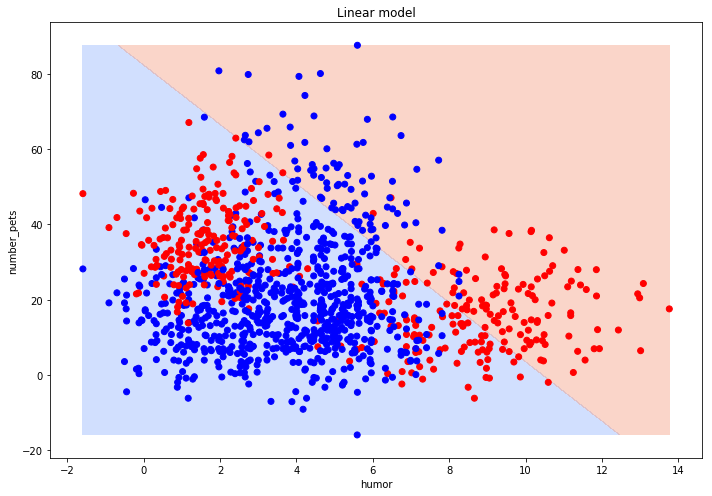

In [6]:
# Get some data: The create_data() function returns 4 variables:
target_name, variable_names, data, y_nonlin = data_tools.create_data()

# Grab the predictors (rows and columns)
x_nonlin = data_tools.X()

# Model
model = LogisticRegression(solver='lbfgs')
model.fit(x_nonlin, y_nonlin)

# Plot
plt.figure(figsize=[10,7])
data_tools.Decision_Surface(x_nonlin, y_nonlin, model, probabilities=False)
plt.title("Linear model")
plt.tight_layout()
plt.show()


What is the accuracy of that model?

In [7]:
accuracy = model.score(x_nonlin,y_nonlin)
print('Training Accuracy: ' + str(accuracy))

Training Accuracy: 0.69


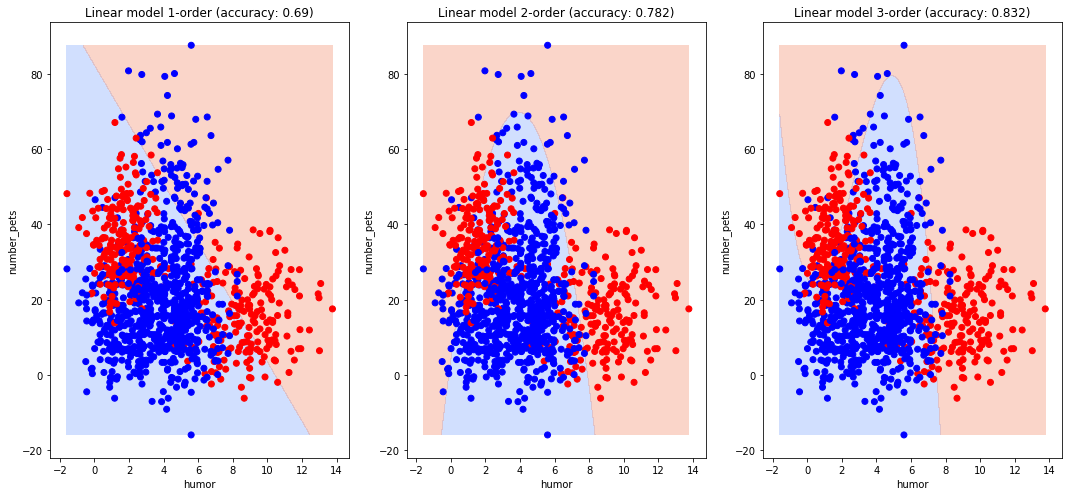

In [8]:
# Settings
max_order = 3  # Maximum of 3 was created in the script:  data_tools.py

nrows = np.floor(np.sqrt(max_order))
ncol = 2 if max_order == 4 else 3
plt.figure(figsize=[15,7*nrows])

for order in range(1, max_order+1):
    # Get a dataset X_complex with non linear variables
    X_complex = data_tools.X(order)
    
    # Model used to predict
    model = LogisticRegression(solver='lbfgs') # penalty='l2'
    model.fit(X_complex, y_nonlin)

    # Plot and calculate accuracy
    plt.subplot(nrows, ncol, order)
    data_tools.Decision_Surface(X_complex, y_nonlin, model, probabilities=False)
    acc_value = metrics.accuracy_score(model.predict(X_complex), y_nonlin) 
    plt.title("Linear model " + str(order) + "-order (accuracy: "+ str(round(acc_value,3))+")")
    
plt.tight_layout()
plt.show()

In [ ]:
# Show probabilities?
show_probabilities = False

# Array of penalty values
penalties = [1,2,3,5]
penalty_type = "l1"

# set tne number of rows and columns for the plots
ncol = 2
nrows = np.ceil(len(penalties)/ncol)
plt.figure(figsize=[15,7*nrows])

idx = 1 # index value (used for arranging the plots)
for inv_penalty in penalties:
    # Get a dataset X_complex with non linear variables
    X_complex = data_tools.X(max_order)
    
    # Model used to predict
    model = LogisticRegression(penalty=penalty_type,C=10**(-inv_penalty))
    model.fit(X_complex, y_nonlin)
    
    # Plot and calculate accuracy

    plt.subplot(nrows, ncol,idx)
    idx = idx +1
    data_tools.Decision_Surface(X_complex, y_nonlin, model, probabilities=show_probabilities)
    acc_value = metrics.accuracy_score(model.predict(X_complex), y_nonlin) 
    plt.title("Linear model " + str(order) + "-order, "+penalty_type.upper()+" penalty: 10^"+str(inv_penalty)+"  (accuracy: "+ str(round(acc_value,3))+")")
    
plt.tight_layout()
plt.show()

Which model is better in this case?? Look at the **accuracy** of each one.   Accuracy is simply the count of correct decisions divided by the total number of decisions.

[From sklearn documentation on sklearn.metrics.accuracy_score: "In multilabel classification, this function computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true."  [More about the accuracy measure..](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)]

Of course, we can also look at the **probabilities** on these non-linear surfaces. Try it out above!

## Generalization

Our evaluation above actually was not what we really want.

What we want are models that **generalize** to data that were not used to build them! In other words, we want this model to be able to predict the target for new data instances! Do we know how well our models generalize? Why is this important?

<img src="images/generalization.png" alt="Drawing" style="width: 600px;"/>


Let's apply this concept to our data. Now, before we fit out models, we set aside some data to be used later for testing ('holdout data').  This allows us to assess whether the model simply fit the training dataset well, or whether it truly fit some regularities in the domain. 

Let's use sklearn to set aside some randomly selected holdout data.

In [9]:
# Set randomness so that we all get the same answer
np.random.seed(842)

# Split the data into train and test pieces for both X and Y
X_train, X_test, Y_train, Y_test = train_test_split(x_nonlin, y_nonlin, train_size=0.80)

/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Now that we have split our data, let's revisit the tree-structured classifier. Let's check how well a model does when it is fit on a training set and then used to predict on both the training set as well as our holdout set. Remember, the model has never seen this holdout "test" set before!

In [11]:
# Model
model = DecisionTreeClassifier(max_depth=20)
model.fit(X_train, Y_train)

print ( "Accuracy on training = %.4f" % metrics.accuracy_score(model.predict(X_train), Y_train) )
print ( "Accuracy on test = %.4f" % metrics.accuracy_score(model.predict(X_test), Y_test) )

Accuracy on training = 1.0000
Accuracy on test = 0.8583


Text(0, 0.5, 'Accuracy')

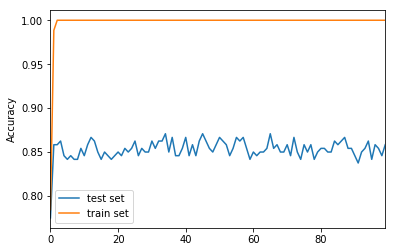

In [21]:
train_acclist = []
test_acclist = []
for d in range(2, 1000, 10):
    model = DecisionTreeClassifier(max_depth=d)
    model.fit(X_train, Y_train)

    acc = metrics.accuracy_score(model.predict(X_test), Y_test)
    test_acclist.append(acc)

    acc = metrics.accuracy_score(model.predict(X_train), Y_train)
    train_acclist.append(acc)
    continue

df = pd.DataFrame()
df["test set"] = test_acclist
df["train set"] = train_acclist
ax = df.plot()
ax.set_ylabel("Accuracy")

The results on the test set were worse. Why is this? Can it ever do beter?

What happens as our tree gets more and more complicated?  (Deeper and deeper.)

In [ ]:
accuracies_train = []
accuracies_test = []
maxdepth = 20
depths = range(1, maxdepth+1)

plt.figure(figsize=[10,7])

for md in depths:
    model = DecisionTreeClassifier(max_depth=md)
    model.fit(X_train, Y_train)
    
    accuracies_train.append(metrics.accuracy_score(model.predict(X_train), Y_train))
    accuracies_test.append(metrics.accuracy_score(model.predict(X_test), Y_test))

plt.plot(depths, accuracies_train, label="Train")
plt.plot(depths, accuracies_test, label="Test")
plt.title("Performance on train and test data")
plt.xlabel("Max depth")
plt.ylabel("Accuracy")
plt.ylim([min(accuracies_test), 1.0])
plt.xlim([1,maxdepth])
plt.legend()
plt.grid()
plt.show()


## Cross validation

Above, we made a single train/test split. We set aside 20% of our data and *never* used it for training. We also never used the 80% of the data set aside for training to test generalizability.  Although this is far better than testing on the training data, which does not measure generalization performance at all, there are two potential problems with the simple holdout approach.

1) Perhaps the random split was particularly bad (or good).  Do we have any confidence in our accuracy estimate?

2) We are using only 20\% of the data for testing.  Could we possibly use the data more fully for testing?

Instead of only making the split once, let's use "cross-validation" -- every record will contribute to testing as well as to training.


<table style="border: 0px">
    <tr style="border: 0px">
        <td style="width: 50%; text-align: justify">
            <img width="100%" height="600px" src="images/cross.png" alt="Drawing" /> <br/>
            <span style="display: block; text-align: center">
                <b>Cross Validation explanation</b>
            </span>
        </td>
        <td style="border: 0px; width: 3%"></td>
        <td style="height: 100%; align: center; text-align: justify">
            <img src="images/stratification.png" height=100% width=100% /> <br/>
            <span style="display: block; text-align: center">
                <b>A structured dataset for a data mining task</b>
            </span>
        </td>
    </tr>
</table>
<br/>


In [ ]:
# Model
model = DecisionTreeClassifier(max_depth=1)
model.fit(X_train, Y_train)

print ( "Cross validation accuracy on training = %.3f" % np.mean(cross_val_score(model, x_nonlin, y_nonlin)) )

We can add this to our plot from above.

In [ ]:
accuracies_cross_validation = []
depths = range(1, 21)

plt.figure(figsize=[10,7])

for md in depths:
    model = DecisionTreeClassifier(max_depth=md)
    
    accuracies_cross_validation.append(np.mean(cross_val_score(model, x_nonlin, y_nonlin,cv=10)))

plt.plot(depths, accuracies_train, label="Train")
plt.plot(depths, accuracies_test, label="Test")
plt.title("Performace on train and test data")
plt.plot(depths, accuracies_cross_validation, label="Cross Validation")
plt.xlabel("Max depth")
plt.ylabel("Accuracy")
plt.ylim([min(accuracies_cross_validation) , 1.0])
plt.xlim([1,20])
plt.legend()
plt.grid()
plt.show()

Why does a deeper tree fit the training data better, but not the test or holdout data?

### Validation Set

<img src="images/validation_set.png" />